In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Obtención de los datos

* Utilizamos la función "read_csv" para importar el csv a Dataframe. Lo imprimimos para ver una primera visual de los datos con los que vamos a trabajar

* Podemos ver que los datos son componentes de vinos y cada uno de ellos presenta una calidad

In [2]:
df = pd.read_csv("archives/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Información general

* Lo primero que haremos sera pedirle al dataframe que nos muestre su información, las columnas que tiene, si tiene nulos y el tipo de dato que tiene en las columnas

* Como podemos observar todos los datos son float excepto la calidad, ya que esta es representada por numeros enteros. También vemos que no presenta ningún dato nulo por lo cual nos facilita mucho su limpieza 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Estudio de los Datos

* Con la siguiente función: El dataframe nos muestra la media, la desviacón estandar, los quartiles, el máximo valor, etc. 

* Esto nos sirve para detectar la presencia de outliers

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


* Ahora mostraremos un histograma de todo el dataframe para observar si presenta relaciones entre datos o algún pico extraño.
    * Se pueden ver picos extraños como por ejemplo en fixed acidity

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

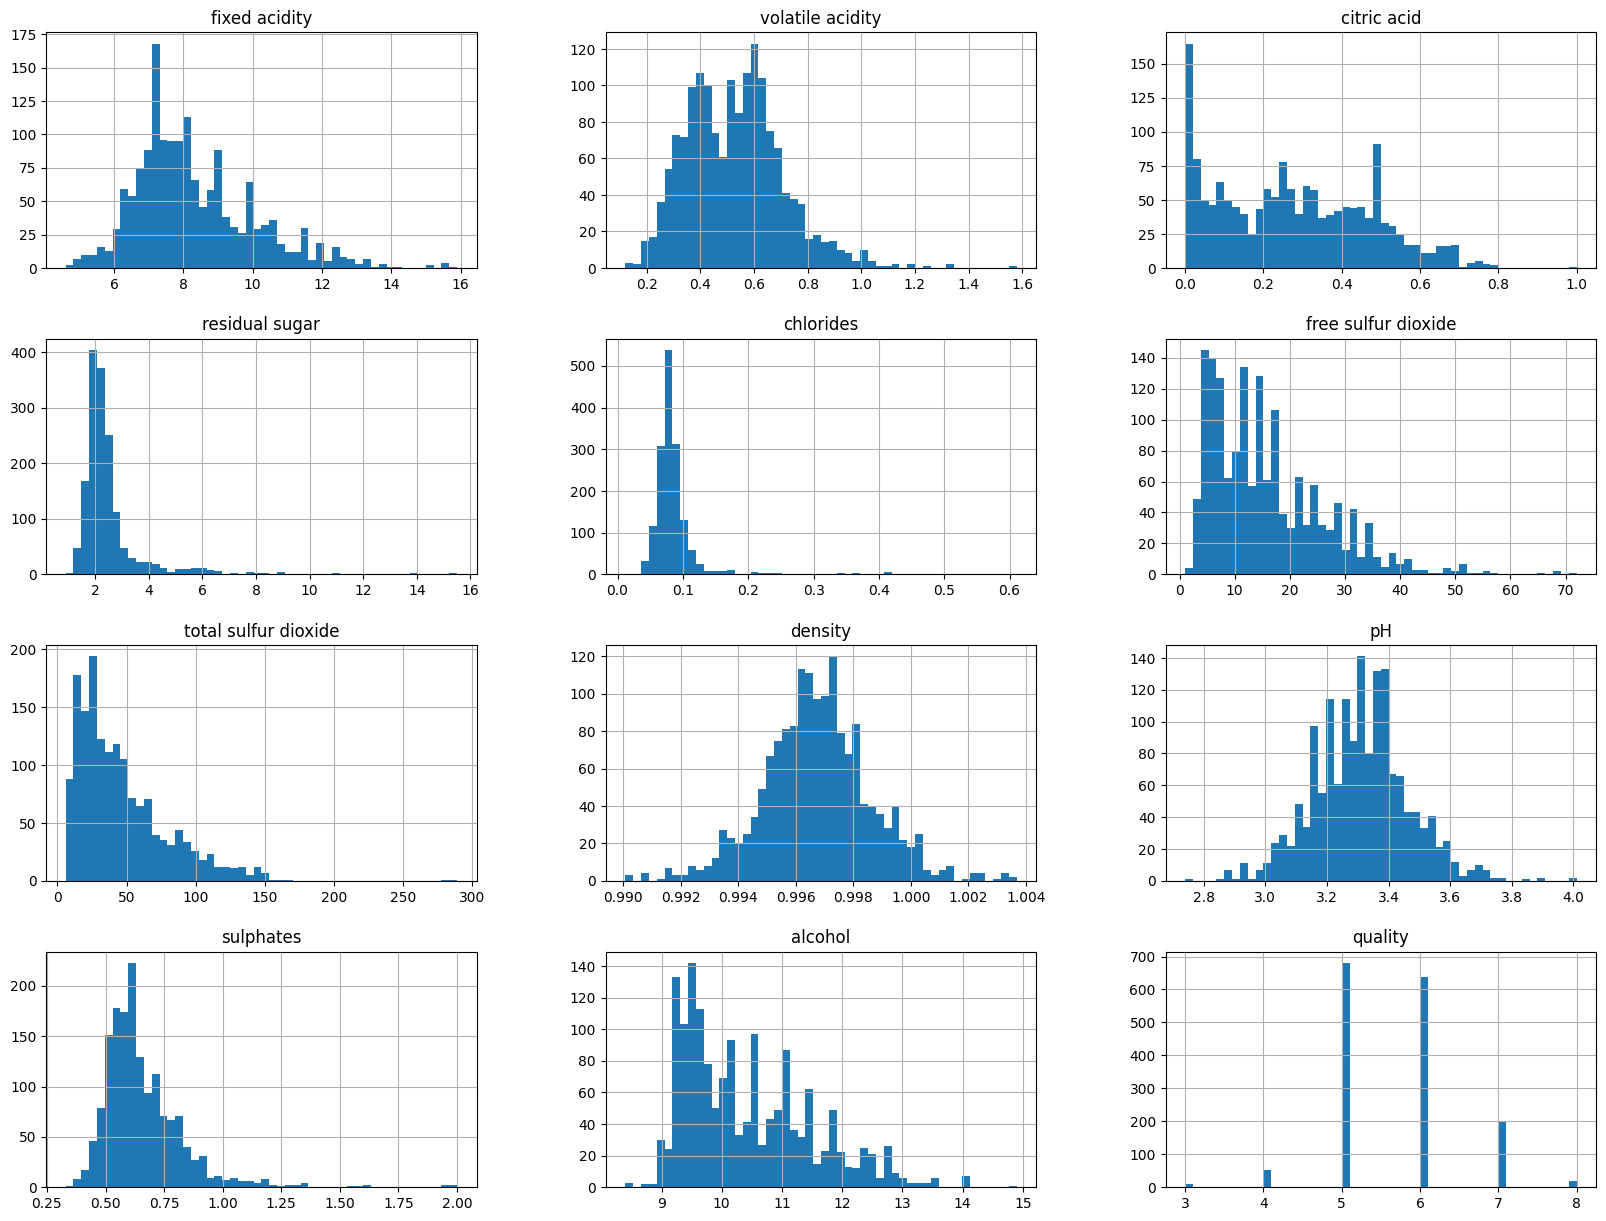

In [6]:
df.hist(figsize=(20,15),bins=50)

# Descubriendo y visualizando datos

## Un par de scatters con color

Lo primero que voy a realizar es un gráfico de tipo scatter con tres valores:
- Alcohol
- Acided [fixed acidity, citric acid, volatile acidity]
- Todo esto en base a la calidad del vino

<Axes: xlabel='alcohol', ylabel='citric acid'>

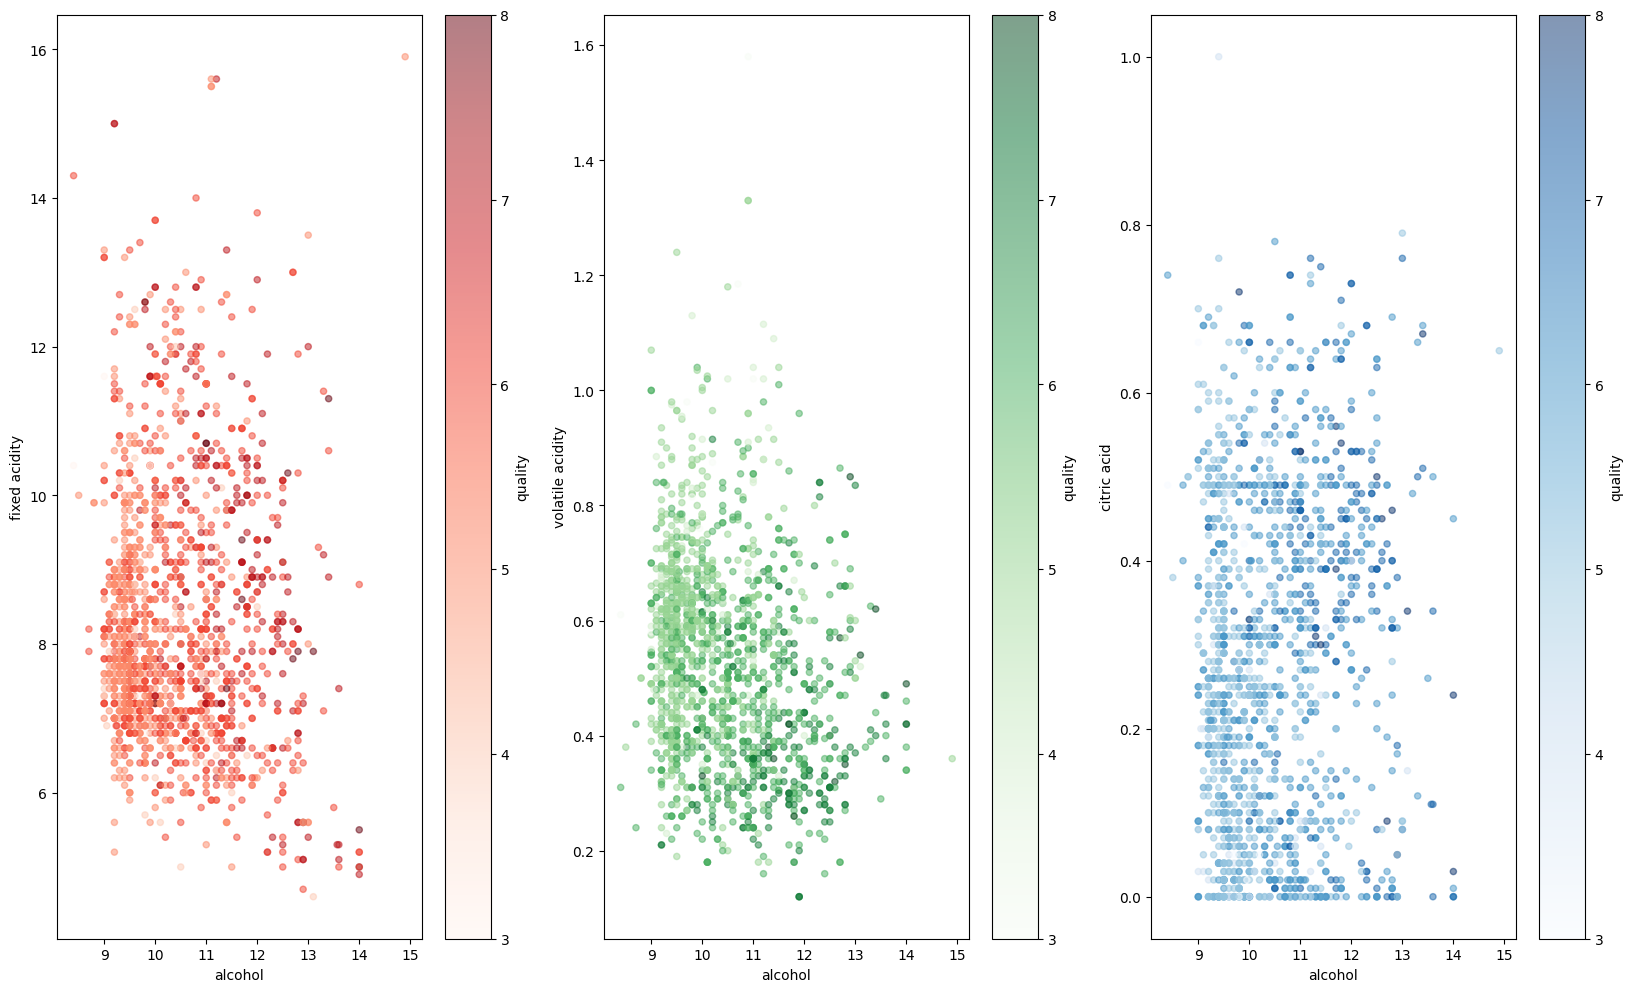

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20, 12))
df.plot(
    ax=axes[0],
    kind="scatter",
    x="alcohol",
    y="fixed acidity",
    alpha=0.5,
    c="quality",
    cmap= "Reds"
)
df.plot(
    ax=axes[1],
    kind="scatter",
    x="alcohol",
    y="volatile acidity",
    alpha=0.5,
    c="quality",
    cmap= "Greens"
)
df.plot(
    ax=axes[2],
    kind="scatter",
    x="alcohol",
    y="citric acid",
    alpha=0.5,
    c="quality",
    cmap= "Blues"
)

A simple vista podemos pensar que tiene tiene mas relación el "fixed acidity" pero fijandonos más a fondo, el volatil y el cítrico tienen valores más altos junto a contraposición del fijo.

### boxplots para cada columna, desglosada por calidad

- Con estos gráficos podremos ver:
    - Un primer acercamiento a la relación de cada columna con la calidad
    - La media y la mediana de los valores de cada columna
    - Ver como se distribuyen los valores en cada columna

In [8]:
def mostrar_cajas(dataframe, columna, axs, position):
    dataframe.boxplot(  column = columna, 
                        by = "quality",
                        notch = True,
                        ax = axs.flatten()[position],
                        patch_artist = True,
                        showmeans = True,
                        boxprops = dict(edgecolor="darkgreen",  facecolor="lightgreen", linewidth=2),
                        capprops = dict(color="darkgreen", linewidth=2), 
                        flierprops = dict(color="darkgreen", markerfacecolor="lightgreen", linestyle= "none", markeredgecolor="none", markersize=9),
                        medianprops = dict(color="darkgreen"),
                        whiskerprops = dict(color="darkgreen",linewidth=1),
                        )

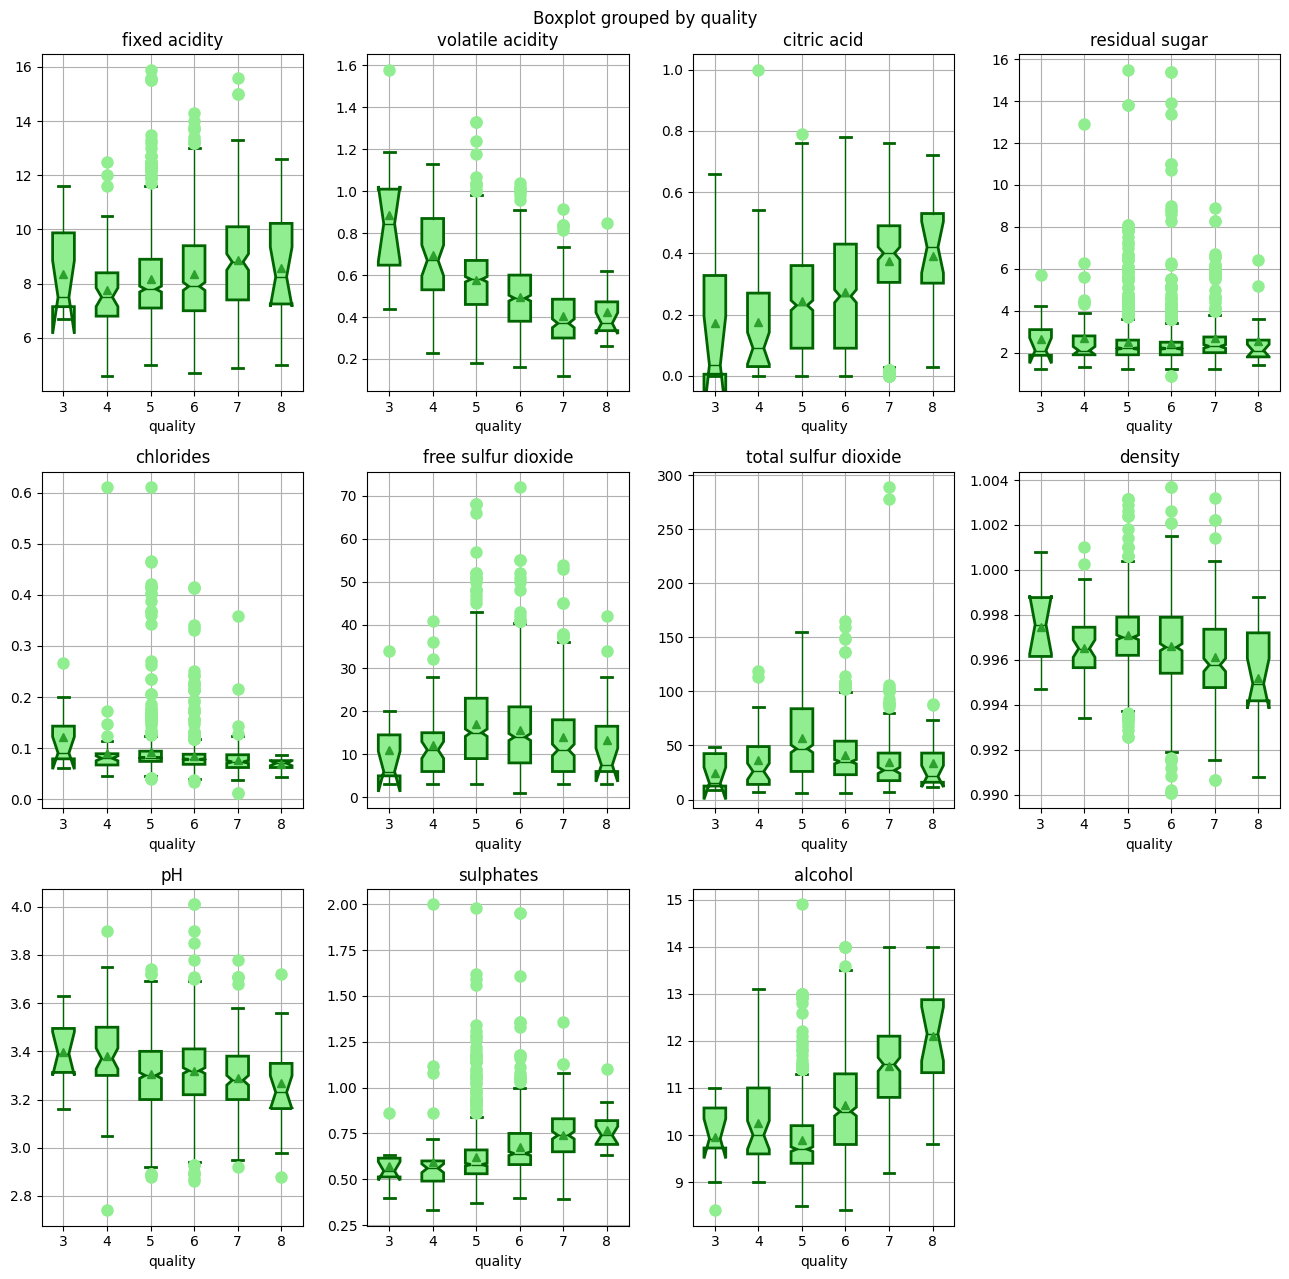

In [9]:
cols = list(df.columns)
cols.pop() # Elimino el index
fig, axes = plt.subplots(3,4)

pos = 0 # Para colocar las cajas uno al lado de la otra
for col in cols:
    mostrar_cajas(df, col, axes, pos)
    pos += 1

# De esta manera junto al flatten de la funcion mostrar_cajas, las pongo una seguida de la otra
fig.delaxes(axes[2,3])
fig.set_figheight(13)
fig.set_figwidth(13)
plt.tight_layout()

## matriz de correlacion y mapa de calor

- Realizamos un mapa de calor para luego poder seleccionar las distintas columnas que tienen relación y crear la matriz de correlación

- Al ser todos los valores numéricos es mucho mas sencillo crear el mapa de calor

- Yo aqui realizo un mapa de colo con distintas librerias para ver cual sería la mejor forma o la más facil de mostrar los datos

### Seaborn

In [10]:
# %conda install -c conda-forge seaborn -y

<Axes: >

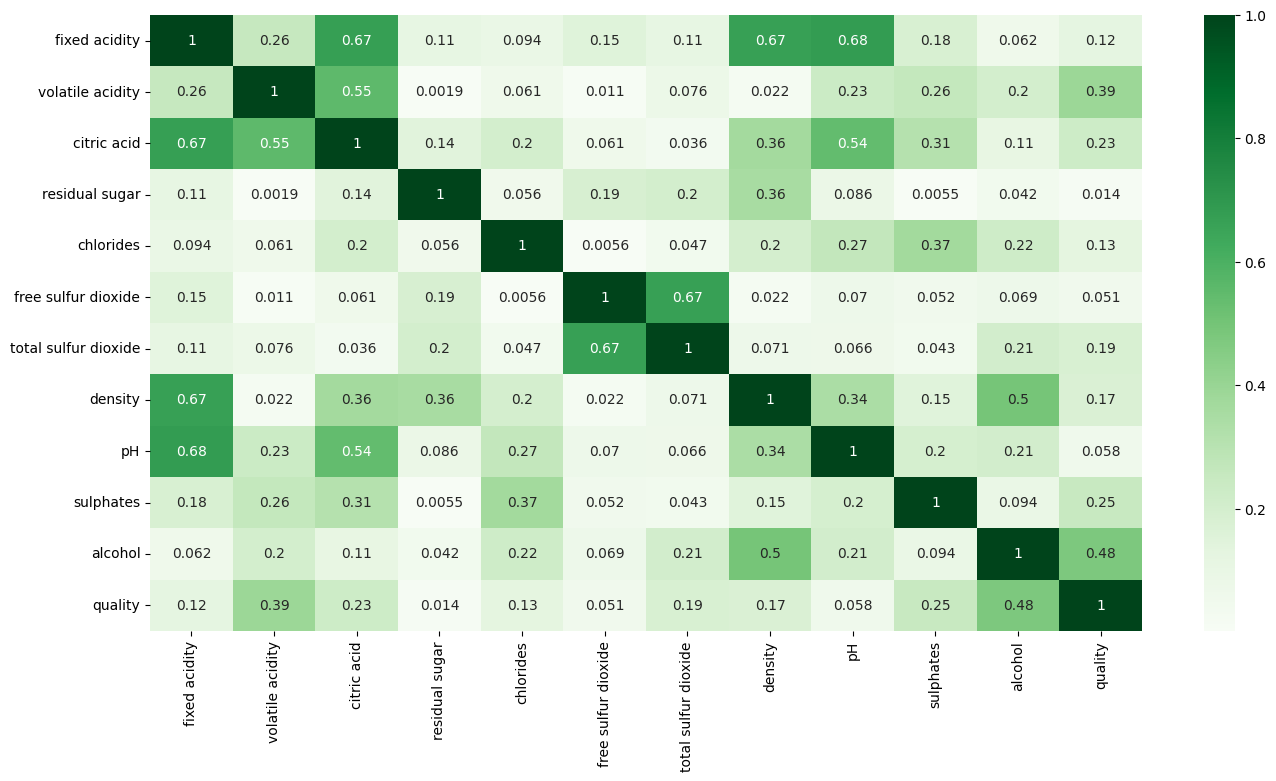

In [11]:
import seaborn as sns

corr_matrix = df.select_dtypes('number').corr()

plt.figure(figsize=(16,8))
sns.heatmap(np.abs(corr_matrix), annot=True, cmap='Greens')

### Jinja2

In [12]:
# %conda install jinja2 -y

In [13]:
# Utilizando jinja2
corr_matrix = df.select_dtypes('number').corr()
corr_matrix.style.background_gradient().bar()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [14]:
corr_matrix.style.background_gradient()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


### Utilizando Matplot

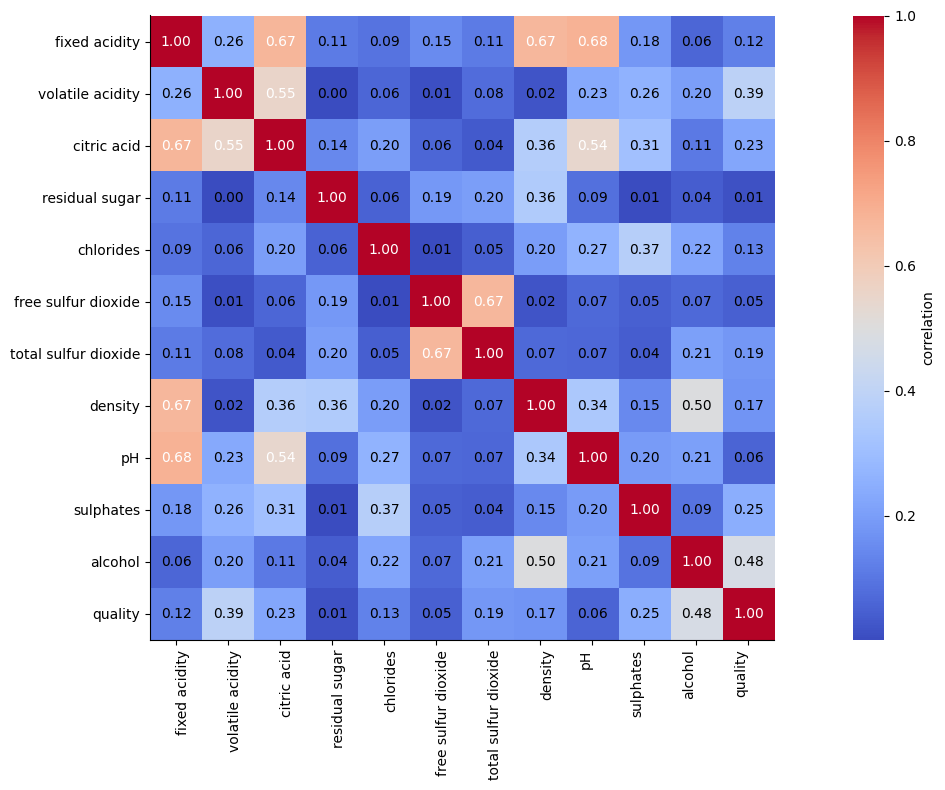

In [15]:
# Recojo en la matrix las columnas con un tipo numerico(float, int, etc)
corr_matrix = df.select_dtypes('number').corr() 

fig, axes = plt.subplots(figsize = (16,8))
text_colors = ("black", "white")
im = axes.imshow(np.abs(corr_matrix), cmap='coolwarm')
cbar = fig.colorbar(im, ax=axes, label="correlation")
cbar.outline.set_visible(False)

x = corr_matrix.columns
y = corr_matrix.index
for i in range(len(y)):
    for j in range(len(x)):
      value = np.abs(corr_matrix.iloc[i, j])
      text_color = text_colors[int(im.norm(value) > 0.5)] # color etiqueta
      axes.text(j, i, f"{value:.2f}" , color=text_color, va= "center" , ha= "center" )

# axes.set_xticks(np.arange(len(corr_matrix.columns)), labels = corr_matrix.columns)
# axes.set_yticks(np.arange(len(corr_matrix)), labels = corr_matrix.columns)

plt.setp(axes.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor") 
axes.set_xticks(range(len(x)))
axes.set_xticklabels(x, rotation=90) # Nombre de las x en vertical
axes.set_yticks(range(len(y)))
axes.set_yticklabels(y) # Nombre de las y en horizontal
axes.spines["right"].set_visible(False) # ocultar borde derecho
axes.spines["top"].set_visible(False) # ocultar borde superior
fig.tight_layout()

En base al mapa de calor, podemos ver que en base a la calidad, las columnas más relacionadas son:

- ["fixed acidity", "volatile acidity", "citric acid", "chlorides", "total sulfur dioxide", "density", "sulphates", "alcohol"]

El azucar residual tiene un valor muy bajo así que podríamos llegar a eliminarlo para crear la matriz de correrlación

## scatter cruzado de las columnas más prometedoras

array([[<Axes: xlabel='fixed acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='citric acid', ylabel='fixed acidity'>,
        <Axes: xlabel='residual sugar', ylabel='fixed acidity'>,
        <Axes: xlabel='chlorides', ylabel='fixed acidity'>,
        <Axes: xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='density', ylabel='fixed acidity'>,
        <Axes: xlabel='pH', ylabel='fixed acidity'>,
        <Axes: xlabel='sulphates', ylabel='fixed acidity'>,
        <Axes: xlabel='alcohol', ylabel='fixed acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='citric acid', ylabel='volatile acidity'>,
        <Axes: xlabel='residual sugar', ylabel='volatile acidity'>,
        <Axes: xlabel='chlorides', ylabel

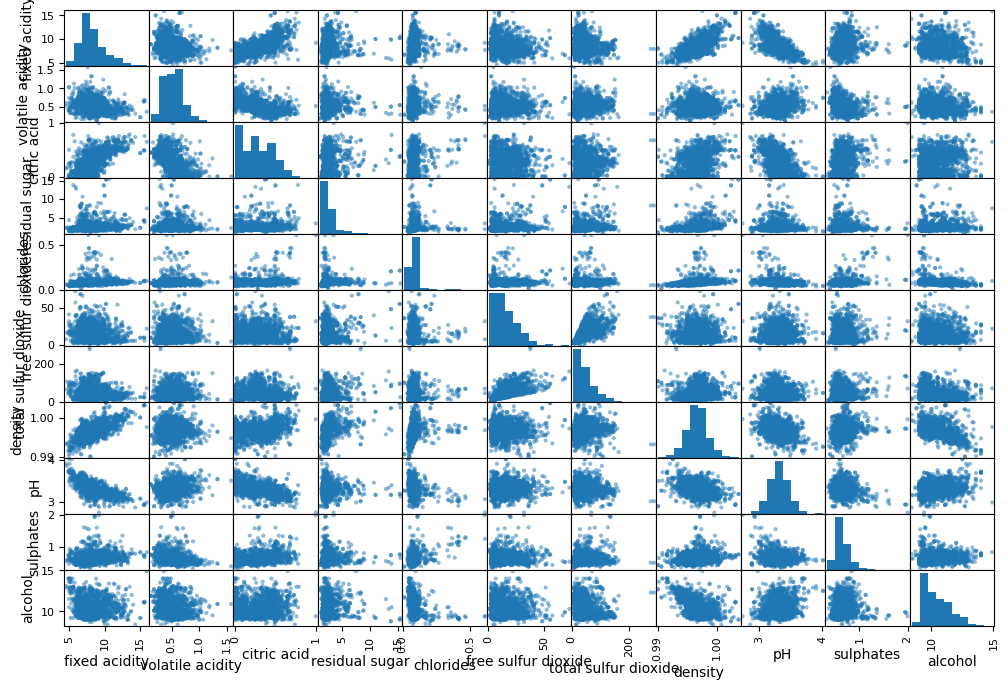

In [16]:
from pandas.plotting import scatter_matrix

atributes = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"] # Todos
# atributes = ["fixed acidity", "volatile acidity", "citric acid", "chlorides", "total sulfur dioxide", "density", "sulphates", "alcohol"] # Valores altos abd 0.1
# atributes = ["volatile acidity", "citric acid", "total sulfur dioxide", "density", "sulphates", "alcohol"] # Valores altos abd +0.15
# atributes = ["volatile acidity", "citric acid", "sulphates", "alcohol"] # Valores altos abs +0.2
# atributes = ["fixed acidity", "citric acid", "sulphates", "alcohol"] # Valores altos positivos
scatter_matrix(df[atributes], figsize=(12,8))

# Preparando los datos para el modelo

Primero copiaremos nuestro dataframe sobre el cual trabajaremos. No sin antes limpiarlo un poco para el modelo:
- En este caso solo vamos a extraerle los outliers


Creamos una función para dividir los datos, unos de test otros de entrenamiento:
- Tenemos varias opciones al darle los datos de entrenamiento y test
    - Coger todas las columnas menos calidad 
    - Coger solo los valores altos sin importar el signo (valor absoluto y mayores a 0.1)
    - Coger los valores absolutos altos, aquellos mayores a 0.15
    - Coger los valores absolutos altos, aquellos mayores a 0.2
    - Coger solo los valores con relación positiva altos

In [17]:
from scipy import stats

def split_train_test(data, test_ratio):
  indices = np.random.permutation(len(data))
  lg_test = int(len(data) * test_ratio)
  test_indices = indices[:lg_test]
  train_indices = indices[lg_test:]

  return data.iloc[train_indices], data.iloc[test_indices]

np.random.seed(42)

df_modelo = df[(np.abs(stats.zscore(df)) < 4).all(axis=1)] # Eliminamos outliers
print(len(df_modelo), len(df))
datos_train, datos_test = split_train_test(df_modelo, 0.2)
print(len(datos_train), len(datos_test))

y_train = datos_train["quality"].copy()
x_train = datos_train.drop("quality", axis=1) # Todos los datos
# x_train = datos_train[["volatile acidity", "citric acid", "sulphates", "alcohol"]] # Valores altos abs +0.2
# x_train = datos_train[["volatile acidity", "citric acid", "total sulfur dioxide", "density", "sulphates", "alcohol"]] # Valores altos abd +0.15
# x_train = datos_train["fixed acidity", "volatile acidity", "citric acid", "chlorides", "total sulfur dioxide", "density", "sulphates", "alcohol"] # Valores altos abd 0.1
# x_train = datos_train[["fixed acidity", "citric acid", "sulphates", "alcohol"]] # Valores altos positivos

y_test = datos_test["quality"].copy()
x_test = datos_test.drop("quality", axis=1) # Todos los datos
# x_test = datos_test[["volatile acidity", "citric acid", "sulphates", "alcohol"]] # Valores altos abs +0.2
# x_test = datos_test["fixed acidity", "volatile acidity", "citric acid", "chlorides", "total sulfur dioxide", "density", "sulphates", "alcohol"] # Valores altos abd 0.1
# x_test = datos_test[["volatile acidity", "citric acid", "total sulfur dioxide", "density", "sulphates", "alcohol"]] # Valores altos abd +0.15
# x_test = datos_test[["fixed acidity", "citric acid", "sulphates", "alcohol"]] # Valores altos positivos

lscores = {}

x_train.head(3)

1537 1599
1230 307


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
211,8.0,0.725,0.24,2.8,0.083,10.0,62.0,0.99685,3.35,0.56,10.0
884,8.8,0.610,0.19,4.0,0.094,30.0,69.0,0.99787,3.22,0.50,10.0
1402,7.6,0.300,0.42,2.0,0.052,6.0,24.0,0.99630,3.44,0.82,11.9


## Seleccionar los modelos y entrenarlos

In [18]:
# Calcular el puntaje y errores de media en cada modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Validacion en cada modelo
from sklearn.model_selection import cross_val_score

- Cuando utilizamos un modelo, tenemos que previamente dividir los datos.
    - Unos son los que vamos a utilizar para entrenar el modelo, los trains (la mayoria de datos)
    - Y el restante seran los de test que van a ser los que el modelo va a itentar descubrir
    - Ejemplo: tenemos 80% de datos para train y 20% para test

- En cada modelo vamos a tener un pequeño ejemplo con los primeros datos que le pasamos al modelo.
- El resultado que nos da el r2_score, el puntaje del modelo, cuando se ha acercado a el valor a descubrir 
    - Este valor va entre 0 y 1

- Y por último hacemos una validación al modelo

### Resultados

In [19]:
def results(model, model_reg):
    predicciones = model_reg.predict(x_test)
    mse = mean_squared_error(y_test, predicciones)
    mse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predicciones)
    score = r2_score(y_test, predicciones)
    print(f"mae: {mae}   rmse: {mse} r2_score: {score}")
    lscores[model] = {}
    lscores[model]["error"] = {}
    lscores[model]["error"]["mae"] = mae
    lscores[model]["error"]["mse"] = mse
    lscores[model]["score"] = score

### Validation

In [20]:
def validation(model, model_reg):
    lin_score = cross_val_score(model_reg, x_train, y_train,
                            scoring = "neg_mean_squared_error", cv=10)
    root_lin_score = np.sqrt(-lin_score)
    lscores[model]["validation"] = {}
    lscores[model]["validation"]["scores"] = list(root_lin_score)
    lscores[model]["validation"]["mean"] = root_lin_score.mean()
    lscores[model]["validation"]["std"] = root_lin_score.std()
    print("scores ",lscores[model]["validation"]["scores"])    
    print("mean ",lscores[model]["validation"]["mean"])
    print("std ",lscores[model]["validation"]["std"])    

### Modelo Linear

In [21]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

datos_prueba =  x_test[:5]
print("PREDICCIONES: ",lin_reg.predict(datos_prueba))
y_reales = y_test[:5]
print("Reales: ", list(y_reales))

PREDICCIONES:  [6.1283553  5.00790155 5.66003857 6.18824925 5.86349647]
Reales:  [7, 5, 5, 7, 5]


#### Resultado Linear

In [22]:
results("linear", lin_reg)

mae: 0.512518369133279   rmse: 0.631091992338416 r2_score: 0.40579341066927255


#### Validacion lineal

In [23]:
validation("linear", lin_reg)

scores  [0.7145296425609065, 0.6345626934902662, 0.6108020846849194, 0.5945977503663258, 0.6575454686503616, 0.6358790925422283, 0.6472891130930706, 0.6757549481511312, 0.6119304633133661, 0.6792837793728669]
mean  0.6462175036225443
std  0.034783657063263515


### Modelo de Arbol

In [24]:
# regresión Decision Tree
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

datos_prueba =  x_test[:5]
print("PREDICCIONES: ",tree_reg.predict(datos_prueba))
y_reales = y_test[:5]
print("Reales: ", list(y_reales))

PREDICCIONES:  [7. 6. 5. 6. 5.]
Reales:  [7, 5, 5, 7, 5]


#### Resultado Arbol

In [25]:
# Porque no deberiamos utilizar train
predicciones = tree_reg.predict(x_train)
mse = mean_squared_error(y_train, predicciones)
mse = np.sqrt(mse)
mae = mean_absolute_error(y_train, predicciones)
score = r2_score(y_train, predicciones)
print(f"mae: {mae}   rmse: {mse} r2_score: {score}")
lscores["treeTrain"] = {}
lscores["treeTrain"]["score"] = score

mae: 0.0   rmse: 0.0 r2_score: 1.0


In [26]:
results("tree", tree_reg)

mae: 0.46905537459283386   rmse: 0.7866972150346806 r2_score: 0.07664788197302608


#### Validacion en arbol

In [27]:
# cross-validation arbol decision
validation("tree", tree_reg)

scores  [0.8506334320800928, 0.7963330593811955, 0.7963330593811955, 0.7597603387632995, 0.8214601316968948, 0.6181535578949711, 0.8263938705413374, 0.7380484043438286, 0.7597603387632995, 0.6984302957695782]
mean  0.7665306488615692
std  0.06557959328212234


### Modelo random forest

In [28]:
# regresión random forest
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(x_train, y_train)

datos_prueba =  x_test[:5]
print("PREDICCIONES: ",rf_reg.predict(datos_prueba))
y_reales = y_test[:5]
print("Reales: ", list(y_reales))

PREDICCIONES:  [6.91 5.18 5.85 6.37 5.3 ]
Reales:  [7, 5, 5, 7, 5]


#### Resultado random forest

In [29]:
results("forest", rf_reg)

mae: 0.43472312703583066   rmse: 0.5927669343312615 r2_score: 0.4757721807129741


#### Validación Forest

In [30]:
validation("forest", rf_reg)

scores  [0.6862742583862352, 0.5470044068727522, 0.513167273319825, 0.5626216219013399, 0.6884222565054332, 0.5372793553553468, 0.5384190950841358, 0.6304031488510354, 0.5387413817619399, 0.6061721830034388]
mean  0.5848504981041482
std  0.06095360548647851


### Modelo SVM

In [31]:
# regresión SVM
from sklearn.svm import SVR

sv_reg = SVR()
sv_reg.fit(x_train, y_train)

datos_prueba =  x_test[:5]
print("PREDICCIONES: ",sv_reg.predict(datos_prueba))
y_reales = y_test[:5]
print("Reales: ", list(y_reales))

PREDICCIONES:  [5.91416932 5.20203067 5.73016302 5.93740364 5.13070705]
Reales:  [7, 5, 5, 7, 5]


#### Resultado SVM

In [32]:
results("svm", sv_reg)

mae: 0.5677762118587957   rmse: 0.7276669599093212 r2_score: 0.21001756270124916


#### Validacion SVM

In [33]:
validation("svm", sv_reg)

scores  [0.8042740524185417, 0.6892391944677786, 0.7378286685054838, 0.6756594444509485, 0.7314266462393217, 0.7225913223257107, 0.7391239345495163, 0.7603361023775519, 0.7153551362695034, 0.8055230247128816]
mean  0.7381357526317238
std  0.040631275956307764


### Modelo XgBoost

In [34]:
# regresión xgboost
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(objetive="reg:squarederror")
xgb_reg.fit(x_train, y_train)

datos_prueba =  x_test[:5]
print("PREDICCIONES: ",xgb_reg.predict(datos_prueba))
y_reales = y_test[:5]
print("Reales: ", list(y_reales))

ModuleNotFoundError: No module named 'xgboost'

#### Resultado XgBoost

In [ ]:
results("xgboost", xgb_reg)

mae: 0.4168032823245766   rmse: 0.6059694199166288 r2_score: 0.45216024986234993


#### Validacion XgBoost

In [ ]:
validation("xgboost", xgb_reg)

[18:39:08] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "objetive" } are not used.



[18:39:08] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "objetive" } are not used.

[18:39:08] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "objetive" } are not used.

[18:39:08] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "objetive" } are not used.

[18:39:08] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "objetive" } are not used.

[18:39:08] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "objetive" } are not used.

[18:39:08] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "objetive" } are not used.

[18:39:08] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "objetive" } are not used.

[18:39

## Regresion dl

In [35]:
X = df_modelo.drop("quality", axis=1)
y = df_modelo["quality"].copy()

In [36]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

In [37]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val =   scaler.transform(X_val)
X_test =  scaler.transform(X_test)

In [39]:
np.random.seed(42)
tf.random.set_seed(42)

In [47]:
X_train.shape

(864, 11)

In [44]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(11,)),
    # keras.layers.Dense(30, activation="relu", input_shape=(8,)),
    keras.layers.Dense(30, activation="relu", name="Activation_layer"),
    keras.layers.Dense(1, name="Output_layer")
], name="modelito")
model.compile(optimizer= keras.optimizers.SGD(learning_rate=0.001),
              loss="mean_squared_error")

model.summary()

Model: "modelito"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Activation_layer (Dense)        │ (None, 30)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 391 (1.53 KB)

 Trainable params: 391 (1.53 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val))

Epoch 1/200


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.0560 - val_loss: 16.9808
Epoch 2/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.9458 - val_loss: 10.5389
Epoch 3/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1998 - val_loss: 6.6364
Epoch 4/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8100 - val_loss: 4.4684
Epoch 5/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.9684 - val_loss: 3.3388
Epoch 6/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0204 - val_loss: 2.7570
Epoch 7/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5346 - val_loss: 2.4405
Epoch 8/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2692 - val_loss: 2.2452
Epoch 9/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1060 - val_loss: 2.1080
Epoch 10/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9913 - val_loss: 2.0006
Epoch 11/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9011 - val_loss: 1.9098
Epoch 12/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8254 - va

<Axes: >

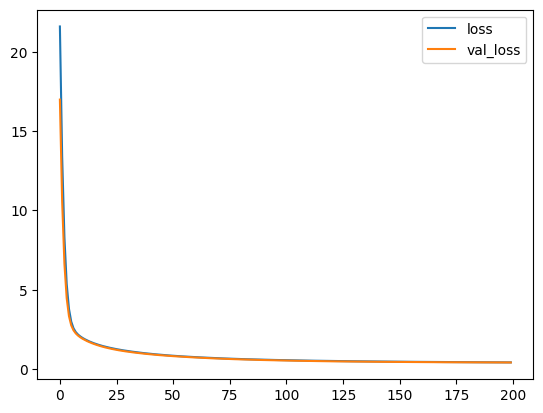

In [46]:
df = pd.DataFrame(history.history)
df.plot()

# Evaluar los resultados

In [ ]:
lscores

{'linear': {'error': {'mae': 0.512518369133279, 'mse': 0.631091992338416},
  'score': 0.40579341066927244,
  'validation': {'scores': [0.7145296425609061,
    0.6345626934902662,
    0.6108020846849193,
    0.5945977503663259,
    0.6575454686503616,
    0.6358790925422283,
    0.6472891130930704,
    0.6757549481511311,
    0.6119304633133666,
    0.6792837793728669],
   'mean': 0.6462175036225442,
   'std': 0.03478365706326338}},
 'treeTrain': {'score': 1.0},
 'tree': {'error': {'mae': 0.46905537459283386, 'mse': 0.7866972150346806},
  'score': 0.07664788197302608,
  'validation': {'scores': [0.8506334320800928,
    0.7963330593811955,
    0.7963330593811955,
    0.7597603387632995,
    0.8214601316968948,
    0.6181535578949711,
    0.8263938705413374,
    0.7380484043438286,
    0.7597603387632995,
    0.6984302957695782],
   'mean': 0.7665306488615692,
   'std': 0.06557959328212234}},
 'forest': {'error': {'mae': 0.43472312703583066, 'mse': 0.5927669343312615},
  'score': 0.475772

In [ ]:
import json, time
with open(f"archives/r2scores_{time.strftime('%d-%m-%Y-%H-%M')}.json", "w+") as outfile: 
    json.dump(lscores, outfile)